In [1]:
from sklearn.datasets import load_boston
from sklearn import preprocessing
boston = load_boston()


In [2]:
print(boston.data.shape)

(506, 13)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
import pandas as pd
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [7]:
bos['PRICE'] = boston.target

scaler = preprocessing.MinMaxScaler((-1,1))
names = bos.columns
d = scaler.fit_transform(bos)
x = pd.DataFrame(d, columns=names)
x.head()

X = x.drop('PRICE', axis = 1)
Y = x['PRICE']

In [8]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


Mean squared error 0.06063612385992809


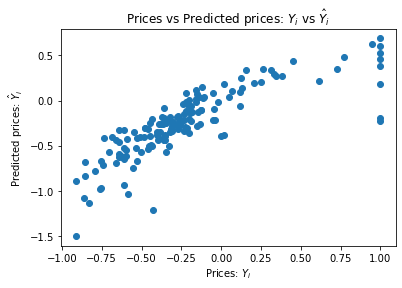

In [9]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)
print("Mean squared error",mean_squared_error(Y_test, Y_pred))

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

c:\users\rex\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


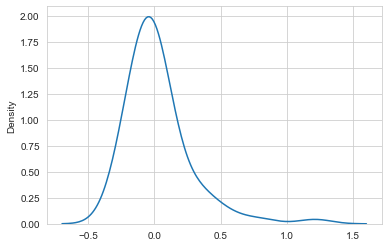

In [10]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


c:\users\rex\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


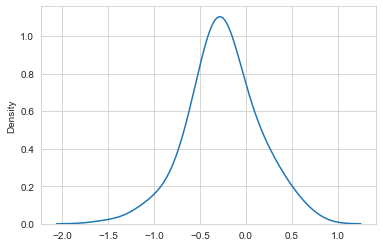

In [11]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

In [12]:
# compute the pair wise correlation for all columns  
correlation_matrix = X_train.corr(method ='pearson').round(2)


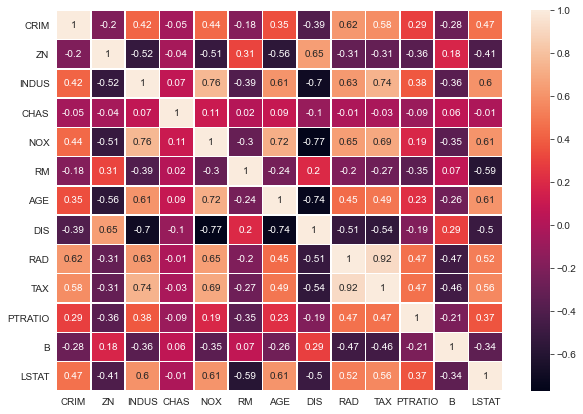

In [13]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square4
plt.figure(figsize=(10, 7))
sns.heatmap(data=correlation_matrix, annot=True,linewidths=.5)
plt.show()

In [14]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

In [15]:
# calculating VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
  
print(vif_data)

    feature        VIF
0      CRIM  15.677079
1        ZN   8.570030
2     INDUS   4.673661
3      CHAS   4.350515
4       NOX   6.321784
5        RM   1.945573
6       AGE   3.901646
7       DIS   9.984521
8       RAD   8.919895
9       TAX  10.341364
10  PTRATIO   2.315426
11        B   5.128582
12    LSTAT   6.182387


## USing PCA to remove multi-collinearity

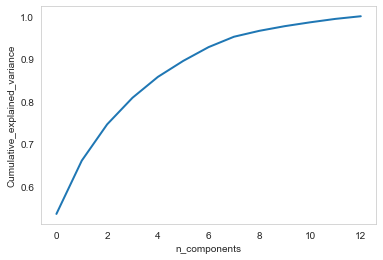

In [16]:
from sklearn import decomposition
pca=decomposition.PCA()
import matplotlib.pyplot as plt
# PCA for dimensionality reduction
pca.n_components=13
pca_data=pca.fit_transform(X)
percentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(percentage_var_explained)
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.grid()
plt.show()

In [17]:
# PCA for dimensionality reduction
pca.n_components=10
pca_data=pd.DataFrame(pca.fit_transform(X))

In [18]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = pca_data.columns

In [19]:
# calculating VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data["VIF"] = [variance_inflation_factor(pca_data.values, i)
                          for i in range(len(pca_data.columns))]
  
print(vif_data)

   feature  VIF
0        0  1.0
1        1  1.0
2        2  1.0
3        3  1.0
4        4  1.0
5        5  1.0
6        6  1.0
7        7  1.0
8        8  1.0
9        9  1.0


In [20]:
# compute the pair wise correlation for all columns  
correlation_matrix = pca_data.corr(method ='pearson').round(2)

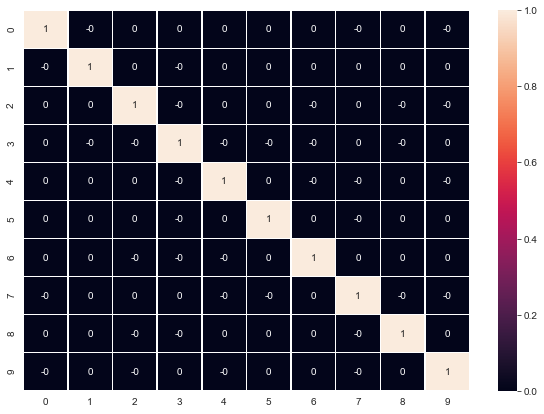

In [21]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square4
plt.figure(figsize=(10, 7))
sns.heatmap(data=correlation_matrix, annot=True,linewidths=.5)
plt.show()

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(pca_data, Y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 10)
(152, 10)
(354,)
(152,)


Mean squared error 0.059154130245928194


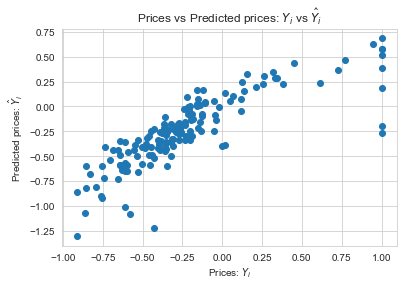

In [23]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)
print("Mean squared error",mean_squared_error(Y_test, Y_pred))

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

## Ridge Regression

In [24]:
from sklearn.linear_model import Ridge
mse=[]
alpha = [10**-3, 10**-2, 10**0, 10**2,10**3,10**4]
for i in alpha:
    lm = Ridge(alpha=i)
    lm.fit(X_train, Y_train)
    Y_pred=lm.predict(X_test)
    mse.append(mean_squared_error(Y_test, Y_pred))




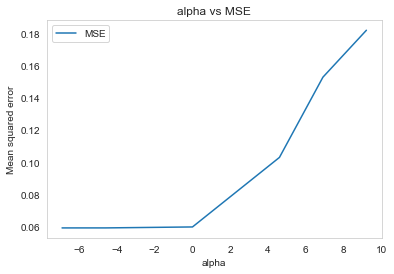

In [25]:
import math
C=[math.log(x) for x in alpha]
# No of neuron ELM vs SBELM
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(C, mse, label='MSE')
plt.title('alpha vs MSE')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.grid()
ax.legend()
plt.show()

In [26]:
lm = Ridge(alpha=0.001)
lm.fit(X_train, Y_train)
Y_pred=lm.predict(X_test)
print("Mean squared error",mean_squared_error(Y_test, Y_pred))

Mean squared error 0.05915471521610407


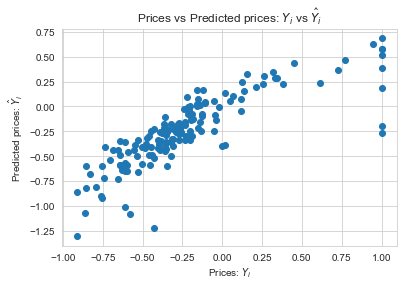

In [27]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

## Lasso Regression

In [28]:
from sklearn.linear_model import Lasso
mse=[]
alpha = [10**-3, 10**-2, 10**0, 10**2,10**3,10**4]
for i in alpha:
    lm = Lasso(alpha=i)
    lm.fit(X_train, Y_train)
    Y_pred=lm.predict(X_test)
    mse.append(mean_squared_error(Y_test, Y_pred))




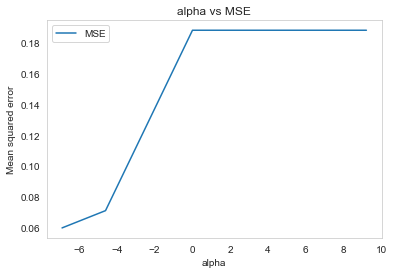

In [29]:
import math
C=[math.log(x) for x in alpha]
# No of neuron ELM vs SBELM
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(C, mse, label='MSE')
plt.title('alpha vs MSE')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.grid()
ax.legend()
plt.show()

In [30]:
lm = Lasso(alpha=0.000001)
lm.fit(X_train, Y_train)
Y_pred=lm.predict(X_test)
print("Mean squared error",mean_squared_error(Y_test, Y_pred))

Mean squared error 0.059154948421028


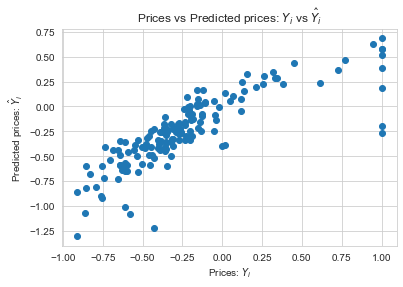

In [31]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

# SGD Regressor

In [36]:
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
clf = SGDRegressor()
clf.fit(X_train, Y_train)
Y_pred=clf.predict(X_test)
print("Mean squared error:",mean_squared_error(Y_test, Y_pred))

Mean squared error: 0.07744502185154749


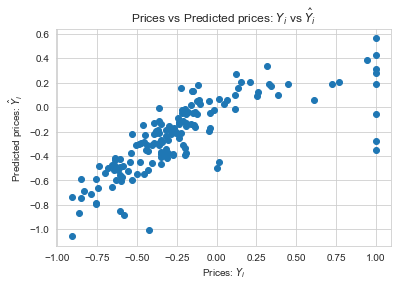

In [37]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

# XGBOOST

In [40]:
# check xgboost version
from xgboost import XGBRegressor

In [43]:
# creating an xgboost regression model
from sklearn.model_selection import GridSearchCV
depths=[1,5,10,50,100,500,1000]
base_learners = [20,40,60,80,100,120]
svm=XGBRegressor(booster='gbtree')
parameters={'max_depth':depths,'n_estimators':base_learners}
clf=GridSearchCV(svm,parameters,n_jobs=-1,cv=3,scoring='neg_root_mean_squared_error',return_train_score=True)
clf.fit(X_train,Y_train)
print('Best Score: %s' % clf.best_score_)
print('Best Hyperparameters: %s' % clf.best_params_)

Best Score: -0.21242057024752062
Best Hyperparameters: {'max_depth': 5, 'n_estimators': 80}


In [44]:
clf=XGBRegressor(max_depth=5,n_estimators=80,booster='gbtree')
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
print("Mean squared error:",mean_squared_error(Y_test, Y_pred))

Mean squared error: 0.04594074489453772
